# ACSE-7 (Inversion and Optimisation)  <a class="tocSkip"></a>

# Homework Lecture 7: Unconstrained Optimisation (solutions) <a class="tocSkip"></a>

<font size="1pt">Some $\LaTeX$ definitions hidden in this cell (double-click to reveal)</font>
$
\newcommand\vec[1]{\mathbf{#1}}
\newcommand\vphi{\boldsymbol{\phi}}
\newcommand\vsig{\boldsymbol{\sigma}}
\newcommand\vlam{\boldsymbol{\lambda}}
\newcommand\mat[1]{\underline{\mathbf{#1}}}
\newcommand\R{\mathbb{R}}
\newcommand\todo[1]{\textcolor{red}#1}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spl
import scipy.optimize as sop
import numpy as np

# ensure fonts in figures are readable:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# this module is provided with the notebook (potential_flow.py)
# NOTE: you may will need to install the triangle python package
# which you can do by running !pip install triangle in your notebook
from potential_flow import *

# these two lines ensure that imported modules are automatically reloaded when changed
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

# Diffusion Equation

We consider the diffusion equation

$$
  \frac{\partial u}{\partial t} - \kappa \frac{\partial^2}{\partial x^2} = s(x, t)
$$

which has many uses, such as the dispersal of microparticles 
through random motion (Brownian motion), the spread of a disolved substance, e.g. a pollutant, in a fluid, or the spread of heat. For the moment let's think of $u$ as a concentration. The coefficient $\kappa$ is the diffusion coefficient. We also consider a source term $s(x,t)$ which represent release of the concentration (can be a sink as well when negative).

This PDE comes with the following initial and boundary conditions:

$$
  u(x, 0) = u_{\text{ic}}(x), \text{ and } \\
  \kappa\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_0} = \Phi_0 \text{ and }
  \kappa\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_1} = \Phi_1
$$

Note that unlike for the advection equation example in the lecture notes we need a boundary condition on both sides of the domain which we assume is the interval $[x_0, x_1]$, and here we chose to apply a Neumann condition. The boundary values $\Phi_{0,1}$ represent the diffusive flux through both boundaries.

## Tangent linear approach

* we have observation data that tells us what the concentration $u(x,t)$ should be at $t=T$, say $u(x, T) \approx u_{\text{obs}}(x)$. We want to chance some parameters $m$ in our diffusion model to improve the match between the predicted concentration $u(x,t)$ predicted by the model and the observation. Write down what a suitable functional $f(u, m)$ would be for the associated optimisation problem

### Solution <a class="tocSkip"></a>
This is the same as for the advection example in the lecture notes, namely we take the (square of the) L2-norm of the mismatch:

$$
  f(u, m) = \int_0^L (u(x,T)-u_{\text{obs}}(x))^2 \mathrm{d}x
$$


* First we consider optimising the diffusion coefficient, so we choose $m$ to be a single parameter, $m=\kappa$, that we want to optimize to improve the match with observations. Write the PDE system as a constraint $g(u, m)$ similar to the advection example with an entry for the actual PDE, and entries for the initial and both boundary conditions.

### Solution <a class="tocSkip"></a>

$$
  g(u, m) = \begin{pmatrix}  
  \frac{\partial u}{\partial t} - m \frac{\partial^2 u}{\partial x^2} - s(x, t) \\
  u(\cdot, 0) - u_{\text{ic}}(\cdot) \\
  \kappa\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_0} - \Phi_0 \\
  \kappa\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_1} - \Phi_1
  \end{pmatrix} =
  \begin{pmatrix}
    0 \\ 0 \\ 0 \\0
  \end{pmatrix}
  \;\;\;
  \begin{array}{c}
    \text{PDE constraint} \\ \text{initial condition} \\
    \text{boundary condition at $x_0$} \\
    \text{boundary condition at $x_1$}
  \end{array}
$$

* In the lecture notes we saw that in the tangent linear approach we need to solve

$$
  \frac{\partial g}{\partial u}\delta u = -\frac{\partial g}{\partial m}\delta m
$$

to obtain the perturbation $\delta u$ in $u$ due to a perturbation $\delta m$ in $m$. In other words:

$$
  \delta u = \frac{du}{dm} \delta m
$$

Work out what the PDE is for $\delta u$, including initial and boundary conditions.

### Solution <a class="tocSkip"></a>
We have

$$
  \frac{\partial g(u, m)}{\partial u} \delta u = \begin{pmatrix}  
  \frac{\partial \delta u}{\partial t} - m\frac{\partial^2 \delta u}{\partial x^2} \\
  \delta u(\cdot, 0) \\
  m\left.\frac{\partial \delta u(x,t)}{\partial x}\right|_{x=x_0}  \\
  m\left.\frac{\partial \delta u(x,t)}{\partial x}\right|_{x=x_1}
  \end{pmatrix}
  \quad \text{ and } \quad
  \frac{\partial g(u, m)}{\partial m} \delta m = \begin{pmatrix}  
  -\delta m\frac{\partial^2 u}{\partial x^2} \\
  0 \\
  \delta m\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_0} \\
  \delta m\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_1}
  \end{pmatrix}
$$

As a PDE that becomes:

$$
  \frac{\partial \delta u}{\partial t} - m\frac{\partial^2 \delta u}{\partial x^2} 
  = \delta m\frac{\partial^2 u}{\partial x^2} 
$$

with initial and boundary conditions:

$$
  \delta u(x, 0) = 0, \text{ and } \\
  m\left.\frac{\partial\delta u(x,t)}{\partial x}\right|_{x=x_0} = 
  -\delta m\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_0}
  \quad \text{ and } \quad
  m\left.\frac{\partial\delta u(x,t)}{\partial x}\right|_{x=x_1} = 
  -\delta m\left.\frac{\partial u(x,t)}{\partial x}\right|_{x=x_1}
$$

* Now, instead of the diffusivity coefficient, we want to invert for optimal boundary fluxes $\Phi_1$ and $\Phi_2$. We want to find the optimal *combination* of these two values, so we optimize for them simultaneously with $m=(\Phi_1, \Phi_2)$ now being a 2-vector. What is the consequence of this for the tangent-linear approach? You don't need to work out the new equations exactly (although it's a good exercise), just indicate what the main difference is with the previous case.

### Solution <a class="tocSkip"></a>
The short answer is that because we now have two optimisation parameters, we need to solve 
two separate PDEs for $\delta u_1$ and a $\delta u_2$:
    
$$
  \delta u_1 = \frac{du}{dm_1} \delta m_1,
  \delta u_2 = \frac{du}{dm_2} \delta m_2,
$$

where $\delta m_1$ and $\delta m_2$ are the pertubations in $m_1=\Phi_1$ and $m_2=\Phi_2$ respectively.


The left-hand side for $\delta u_1$ and $\delta u_2$ look the same:

$$
  \frac{\partial g(u, m)}{\partial u} \delta u_1 = \begin{pmatrix}  
  \frac{\partial \delta u_1}{\partial t} - \kappa\frac{\partial^2 \delta u_1}{\partial x^2} \\
  \delta u_1(\cdot, 0) \\
  \kappa\left.\frac{\partial \delta u_1(x,t)}{\partial x}\right|_{x=x_0}  \\
  \kappa\left.\frac{\partial \delta u_1(x,t)}{\partial x}\right|_{x=x_1}
  \end{pmatrix}
  \quad\text{and}\quad
   \frac{\partial g(u, m)}{\partial u} \delta u_2 = \begin{pmatrix}  
  \frac{\partial \delta u_2}{\partial t} - \kappa\frac{\partial^2 \delta u_{1,2}}{\partial x^2} \\
  \delta u_2(\cdot, 0) \\
  \kappa\left.\frac{\partial \delta u_2(x,t)}{\partial x}\right|_{x=x_0}  \\
  \kappa\left.\frac{\partial \delta u_2(x,t)}{\partial x}\right|_{x=x_1}
  \end{pmatrix}
$$
$$

but on the right-hand side we have

$$
  \frac{\partial g(u, m)}{\partial m_1} \delta m_1 = \begin{pmatrix}  
  0 \\
  0 \\
  -\delta m_1 \\
  0
  \end{pmatrix}
  \quad\text{ and }\quad
  \frac{\partial g(u, m)}{\partial m_1} \delta m_1 = \begin{pmatrix}  
  0 \\
  0 \\
  0 \\
  -\delta m_2
  \end{pmatrix}
$$

which results in the same PDE for both $\delta u_1$ and $\delta u_2$:

\begin{align*}
  \frac{\partial \delta u_1}{\partial t} - \kappa\frac{\partial^2 \delta u_1}{\partial x^2} &= 0 \\
  \frac{\partial \delta u_2}{\partial t} - \kappa\frac{\partial^2 \delta u_2}{\partial x^2} &= 0
\end{align*}

with initial condition

$$
  \delta u_1(x,0) = 0 \quad\text{and}\quad
  \delta u_2(x,0) = 0
$$

but with different boundary conditions:

$$
  \kappa\left.\frac{\partial \delta u_1(x,t)}{\partial x}\right|_{x=x_0} = \delta m_1, \quad
  \kappa\left.\frac{\partial \delta u_1(x,t)}{\partial x}\right|_{x=x_1} = 0
$$

for $\delta u_1$, whereas for $\delta u_2$ we have:

$$
  \kappa\left.\frac{\partial \delta u_2(x,t)}{\partial x}\right|_{x=x_0} = 0, \quad
  \kappa\left.\frac{\partial \delta u_2(x,t)}{\partial x}\right|_{x=x_1} = \delta m_2
$$

* Finally, we consider optimising the source term $s(x,t)$ and thus the optimisation parameter $m$ becomes a function $m(x,t) = s(x,t)$. Would we still be able to use the tangent-linear approach in this case to compute the gradient $df/dm$ ?

### Solution <a class="tocSkip"></a>
No, the tangent-linear approach would not be practically possible. We can solve the perturbation $\delta u$ in $u$ for any perturbation $\delta m=\delta s$, but since there are infinitely many possibilities for the source perturbation, we would never be able to compute the complete gradient $df/dm$ in this way.

# Airfoil Optimisation

In the tutorial of lecture 5, we have seen the following code (available from the `potential_flow.py` module) that implements the so called panel method:

In [3]:
x = np.loadtxt('naca0012.dat')  # load the vertices of the polygon of a standard airfoil

u_inf = 1.  # upstream velocity
alpha = np.deg2rad(4)  # angle of attack of upstream velocity with respect to the airfoil

pfpm = PotentialFlowPanelMethod(x, u_inf, alpha)

A, b = pfpm.assemble()
sigma = sl.solve(A, b)  # can be replaced by a faster solver

From the solution vector $\vsig$ we can compute the flow around an airfoil described by a polygon, stored as its vertices in a vector $\vec x$, and compute the lift coefficient of the airfoil:

C_L (PM): 0.47772616515867544


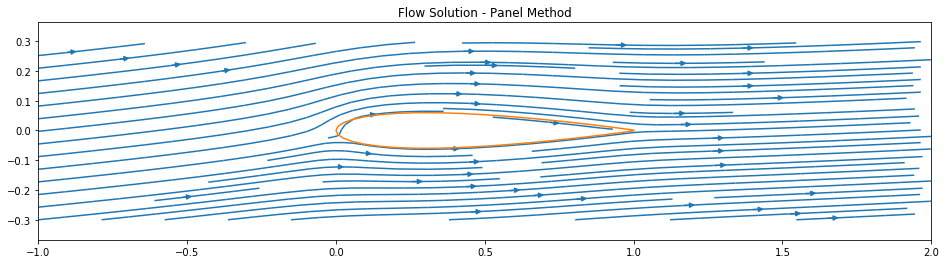

In [4]:
plt.figure(figsize=(16,4))
xg, yg = np.meshgrid(np.linspace(-1, 2, 40), np.linspace(-.3,.3, 40))
pfpm.plot_solution(sigma, xg, yg)
plt.title('Flow Solution - Panel Method')
plt.axis('equal');

print("C_L (PM):", pfpm.lift_coeffcient(sigma))

Using the adjoint technique we have seen in today's lecture, we can now perform an optimisation of the airfoil that optimises its shape in order to maximize its lift force. 

This optimisation will be based on a functional

$$
  f(\vsig, \vec x) = -\text{lift}(\vsig, \vec x) + \text{penalty}(Q(\vec x))
$$

where $\text{lift}(\vsig, \vec x)$ is the function that computes the lift based on the solution $\vsig$ and the shape of airfoil $\vec x$. We also have a penalty term $\text{penalty}(Q(\vec x))$ where $Q(\vec x)$ is the shape factor that we have implemented in tutorial L5:

$$
  Q(\vec x) = \frac l{\sqrt{A}}
$$

which has a minimum when the airfoil has the shape of an ellipse with a user-specified width/height aspect ratio. The penalty term rapidly increases as $\vec Q(\vec x)$ reaches an, again user-specified, maximum $Q_{\text{max}}$ to avoid the shape of the airfoil to deviate too much. More details about the exact form of the penalty term ...

As we minimize $f$, we maximize the lift of the airfoil while keeping its shape somewhat under control. Since our model does not take drag into account, if we would only optimize for lift, we would obtain some crazy shapes with a large vertical extent.

The functional is implemented in `AirfoilFunctional` class (with some reasonable defaults for the user-specified parameters) in the `airfoil_functional.py` python module that comes with this tutorial. It also implements the derivatives 

$$
  \frac{\partial f(\vsig, \vec x)}{\partial \vsig} \quad\text{ and }
    \frac{\partial f(\vsig, \vec x)}{\partial \vec x} \quad\text{ and }
$$

that we will need. It relies on the `grad_shape_factor` function we derived and tested in lecture 4 (the solution has been copied into this module).

In [5]:
from airfoil_functional import AirfoilFunctional
# partial derivatives of f
af = AirfoilFunctional()

# evaluate functional for given sigma and x:
print("Functional value:", af.f(sigma,x))

# evaluate the derivatives:
dfds = af.grad_sigma_f(sigma, x)
dfdx = af.grad_x_f(sigma, x)

C_L, Q, penalty, f(sigma, x) 0.5063064843150035 4.254208081494124 45.52291155313214 45.016605068817135
Functional value: 45.016605068817135


The panel method that computes our $\vsig$-values can be described as a PDE constraint 

$$
  g(\vsig, \vec x)=\mat A(\vec x)\vsig - \vec b(\vec x) = 0
$$

(see above how to obtain $\mat A$ and $\vec b$), 
and we also need its derivative:

$$
  \frac{\partial g(\vsig, \vec x)}{\partial\vec x} = \frac{\partial \mat A(\vec x)\vsig}{\partial\vec x} -
  \frac{\partial \vec b(\vec x)}{\partial\vec x}
$$

The latter has been implemented in the `panel_method_derivatives.py` module:

In [6]:
from panel_method_derivatives import panel_method_x_derivative
# partial derivatives of g
dgdx = panel_method_x_derivative(sigma, x, u_inf, alpha)

1. The shape of the airfoil are the parameters we want to optimize ($\vec m$ in the lecture), and $\vsig$ the solution of the PDE ($\vec u$) in the lecture. In the lecture we saw how we can formulate a reduced optimisation problem by defining a reduced functional:

$$
  \hat f(\vec x) = f(\vsig(\vec x), \vec x)
$$

where $\vsig(\vec x)$ is in this case the solution to

$$
  \mat A(\vec x)\vsig - \vec b(\vec x)
$$

Implement a function `fhat` that takes a vector $\vec x$ and returns the solution $\vsig$. Note that for every new vector  $\vec x$ you need to create a new `PotentialFlowMethod` object `pf`. You can reuse the `af` `AirfoilFunctional` object as it stays the same.

### Solution <a class="tocSkip"/></a>
We simply repeat the steps from above.

In [7]:
def fhat(x):
    pfpm = PotentialFlowPanelMethod(x, u_inf, alpha)

    A, b = pfpm.assemble()
    sigma = sl.solve(A, b)
        
    return af.f(sigma, x)

2. In today's lecture we have seen how the derivative of the reduced functional can be calculated in three steps. For convenience we repeat these here expressed in terms of $\vec x$ and $\vsig$:

i. For a given $\vec x$ compute $\vsig(\vec x)$.

ii. Using $\vec x$ and $\vsig$ solve the adjoint equation for $\vlam$:

$$
    \left(\frac{\partial g(\vsig, \vec x)}{\partial \vsig}\right)^T
  \vlam = \left(\frac{\partial f(\vsig, \vec x)}{\partial \vsig}\right)^T
$$

Note that since $g(\vsig, \vec x)=\mat A\vsig - \vec b$ is linear, this becomes simply

$$
    \mat A^T \vlam = \left(\frac{\partial f(\vsig, \vec x)}{\partial \vsig}\right)^T
$$

The right-hand side of this equation is given by the `grad_sigma_f` method of `af`.

iii. Assemble the derivative:

$$
  \frac{d\hat f(\vec x)}{d\vec x} = \frac{\partial f(\vsig, \vec x)}{\partial \vec x} - \vlam\cdot \frac{\partial g(\vsig, \vec x)}{\partial \vec x}
$$

The first term is given by the `grad_x_f` method of `af`. For the second term we use `panel_method_x_derivative`. **Hint:** for the dot-product you should not use `np.dot`. In our implementation $\vlam$ is a $n+1$-vector, the $\vec x$ positions are a $n+1\times 2$-vector, and $\partial g/\partial\vec x$ is $n+1\times n+1\times 2$. We should be summing over the index of $\vlam$ together with the *first* index of $\partial g/\partial\vec x$ (which correspond to the $n+1$ equations in $g$), however `np.dot` would contract over the second index of $\partial g/\partial\vec x$. Instead you may use `np.tensordot` in the following way:
```python
    # assume lam is a n+1 array
    dgdx = panel_method_x_deriviate(sigma, x, u_inf, alpha)  # returns n+1 x n+1 x 2 array
    lambda_dot_dgdx = np.tensordot(lam, dgdx, ((0,), (0,)))
```

Implement a function `grad_fhat` that performs these three steps and return the gradient $\frac{d\hat f(\vec x)}{d\vec x}$.

### Solution <a class="tocSkip"/></a>
See the function below:

In [8]:
def grad_fhat(x):
    # step 1
    pfpm = PotentialFlowPanelMethod(x, u_inf, alpha)

    A, b = pfpm.assemble()
    sigma = sl.solve(A, b)

    # step 2
    dfds = af.grad_sigma_f(sigma, x)
    lam = sl.solve(A.T, dfds)

    # step 3
    dfdx = af.grad_x_f(sigma, x)
    dgdx = panel_method_x_derivative(sigma, x, u_inf, alpha)
    lambda_dot_dgdx = np.tensordot(lam, dgdx, ((0,), (0,)))

    return dfdx - lambda_dot_dgdx

3. In lecture 4 we learned about the importance of testing your gradient functions. Import the `taylor_test` from the `utility.py` module and run a Taylor test on `grad_fhat`. Go back to quesiton 2 if you are not passing the test!

In [ ]:
from utility import taylor_test
# you can also start from a different polygon by using e.g. regular_polygon:
x0 = np.loadtxt('naca0012.dat')
# a random perturbation of +- 0.01
dx = (np.random.random(x0.shape) - 0.5) * 0.02
taylor_test(fhat, grad_fhat, x0, dx)

### Solution <a class="tocSkip"/></a>
This is what I get:

C_L, Q, penalty, f(sigma, x) 0.8104035361711273 6.104829481292812 230.58505153300104 229.7746479968299
C_L, Q, penalty, f(sigma, x) 0.5063064843150019 4.254208081494124 45.52291155313214 45.016605068817135
C_L, Q, penalty, f(sigma, x) 0.6332423517266498 4.744252989533665 94.52740235708629 93.89416000535964
C_L, Q, penalty, f(sigma, x) 0.5063064843150019 4.254208081494124 45.52291155313214 45.016605068817135
C_L, Q, penalty, f(sigma, x) 0.5604811784036885 4.3788370650069925 57.98580990441903 57.42532872601534
C_L, Q, penalty, f(sigma, x) 0.5063064843150019 4.254208081494124 45.52291155313214 45.016605068817135
C_L, Q, penalty, f(sigma, x) 0.5317352039436082 4.294740232387678 49.57612664248757 49.04439143854396
C_L, Q, penalty, f(sigma, x) 0.5063064843150019 4.254208081494124 45.52291155313214 45.016605068817135
C_L, Q, penalty, f(sigma, x) 0.5189897232411347 4.269922566745956 47.09436007831539 46.575370355074256
C_L, Q, penalty, f(sigma, x) 0.5063064843150019 4.254208081494124 45.522911

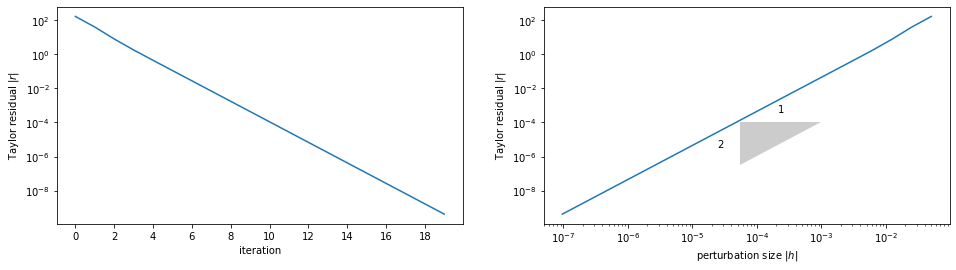

In [9]:
from utility import taylor_test
# you can also start from a different polygon by using e.g. regular_polygon:
x0 = np.loadtxt('naca0012.dat')
# a random perturbation of +- 0.01
dx = (np.random.random(x0.shape) - 0.5) * 0.02
taylor_test(fhat, grad_fhat, x0, dx)

4. Now we have all the ingredients for the optimisation! You can use the `ShapeOptimisationProblem` we used in tutorial L4 which wraps [scipy's minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). This is to ensure that the vector $\vec x$ of locations, which we store as a $n+1\times 2$ array, gets reshaped into a flat $2(n+1)$ array that scipy's minimize expects. Of course you will probably need more than the 10 maximum iteration that are specified below, but you can start with this to test that everything works:

In [65]:
from utility import ShapeOptimisationProblem
x0 = np.loadtxt('naca0012.dat')
so = ShapeOptimisationProblem(x0, fhat, grad_fhat)
result = so.minimize(method='BFGS', tol=0.01, options={'maxiter': 10})

Afterwards you can plot the shapes during the iterations, using:

In [ ]:
for i, x in enumerate(so.x_i[:]):
    plt.figure(figsize=(16,4))
    plt.plot(x[:,0], x[:,1], '.-')
    plt.axis('equal')
    plt.title('Evaluation {}'.format(i))
    plt.show()

Of course, you also want to check whether the lift coefficient has actually increased:

In [ ]:
x = so.x  # this is the last iterate

# recompute sigma:
pfpm = PotentialFlowPanelMethod(x, u_inf, alpha)
A, b = pfpm.assemble()
sigma = sl.solve(A, b)


print(af.lift(sigma, x))

### Solution <a class="tocSkip"></a>
My results:

In [24]:
from utility import ShapeOptimisationProblem
x0 = np.loadtxt('naca0012.dat')
so = ShapeOptimisationProblem(x0, fhat, grad_fhat)
result = so.minimize(method='BFGS', tol=0.01, options={'maxiter': 200})

C_L, Q, penalty, f(sigma, x) 0.5063064843150035 4.254208081494124 45.52291155313214 45.016605068817135
C_L, Q, penalty, f(sigma, x) -0.8622634281408749 113.9252835726174 11012.630460665461 11013.492724093601
C_L, Q, penalty, f(sigma, x) 0.7127701841710117 10.972998715881031 717.4019749918228 716.6892048076518
C_L, Q, penalty, f(sigma, x) 0.5097397542370342 4.240333571159492 44.13546051966896 43.62572076543193
C_L, Q, penalty, f(sigma, x) 0.5104272835452809 4.216118282677354 41.7139316714552 41.203504387909916
C_L, Q, penalty, f(sigma, x) 0.5121163423889934 4.17270572727575 37.37267613129482 36.860559788905825
C_L, Q, penalty, f(sigma, x) 0.5158329870781417 4.123064325372787 32.408535940998455 31.892702953920313
C_L, Q, penalty, f(sigma, x) 0.5204470407256795 4.064227242833643 26.524827687084056 26.004380646358378
C_L, Q, penalty, f(sigma, x) 0.525624094723499 4.07575772516164 27.677875919883817 27.152251825160317
C_L, Q, penalty, f(sigma, x) 0.5231131209253864 4.0216171804368095 22.263

C_L, Q, penalty, f(sigma, x) 1.4830350448817284 3.7998893705058565 0.09109323830437077 -1.3919418065773577
C_L, Q, penalty, f(sigma, x) 1.4828196222097025 3.7992305216013467 0.07169797677005087 -1.4111216454396516
C_L, Q, penalty, f(sigma, x) 1.5203702616919257 3.799364509341112 0.07361113166282003 -1.4467591300291056
C_L, Q, penalty, f(sigma, x) 1.6009139892291484 3.8011072524024887 0.2128286439686497 -1.3880853452604986
C_L, Q, penalty, f(sigma, x) 1.544403601599472 3.7996382366140513 0.07924520189824197 -1.46515839970123
C_L, Q, penalty, f(sigma, x) 1.5912045177806706 3.8004432453299297 0.14642793671275162 -1.444776581067919
C_L, Q, penalty, f(sigma, x) 1.559872422000219 3.7998026584752407 0.08530574702006156 -1.4745666749801574
C_L, Q, penalty, f(sigma, x) 1.5775734030020545 3.799842736866216 0.08757590144193653 -1.489997501560118
C_L, Q, penalty, f(sigma, x) 1.5978600486858674 3.7997718699545584 0.08385594716868605 -1.5140041015171812
C_L, Q, penalty, f(sigma, x) 1.639471593592336

C_L, Q, penalty, f(sigma, x) 1.965035342751044 3.7956865583083097 0.05446019157171989 -1.910575151179324
C_L, Q, penalty, f(sigma, x) 1.9650427273848783 3.7956897249942863 0.054467535704719613 -1.9105751916801588
C_L, Q, penalty, f(sigma, x) 1.9650480404324642 3.7956919881872913 0.05447278777651697 -1.9105752526559472
C_L, Q, penalty, f(sigma, x) 1.9650478134006344 3.7956918548804306 0.05447247834190077 -1.9105753350587336
C_L, Q, penalty, f(sigma, x) 1.965040515216056 3.795688672061462 0.05446509315932269 -1.9105754220567333
C_L, Q, penalty, f(sigma, x) 1.965030574157444 3.7956843521207473 0.0544550781988841 -1.91057549595856
C_L, Q, penalty, f(sigma, x) 1.9650235030445105 3.7956812725258806 0.05444794486295365 -1.9105755581815569
C_L, Q, penalty, f(sigma, x) 1.9650224306857644 3.7956807866343008 0.0544468198458011 -1.9105756108399634
C_L, Q, penalty, f(sigma, x) 1.9650271785495805 3.795682820438758 0.054451529692868254 -1.9105756488567123
C_L, Q, penalty, f(sigma, x) 1.96503345339476

Checking we actually converged:

In [25]:
result

      fun: -1.910575872627063
 hess_inv: array([[ 4.29708223e-03,  1.59855000e-04,  1.40175507e-04, ...,
         5.13962790e-06, -1.66826198e-05, -2.19507210e-05],
       [ 1.59855000e-04,  9.67569034e-05,  8.33106807e-05, ...,
        -1.02598629e-05, -1.02695294e-05, -2.48853911e-06],
       [ 1.40175507e-04,  8.33106807e-05,  1.17353238e-04, ...,
        -1.86522286e-05, -1.12012565e-05, -3.02524959e-06],
       ...,
       [ 5.13962787e-06, -1.02598629e-05, -1.86522286e-05, ...,
         2.56147370e-05,  7.20514277e-06,  6.05288586e-06],
       [-1.66826199e-05, -1.02695294e-05, -1.12012565e-05, ...,
         7.20514277e-06,  1.48889032e-05,  6.63595581e-06],
       [-2.19507210e-05, -2.48853911e-06, -3.02524959e-06, ...,
         6.05288586e-06,  6.63595581e-06,  7.23254042e-06]])
      jac: array([ 2.17751253e-04, -3.08514685e-03, -2.23676111e-03,  4.39226507e-03,
       -8.67062813e-04,  2.96886051e-03, -3.06184949e-03, -6.43771077e-04,
        2.50509735e-03,  1.25154913e-03, 

Plotting every 10th iteration:

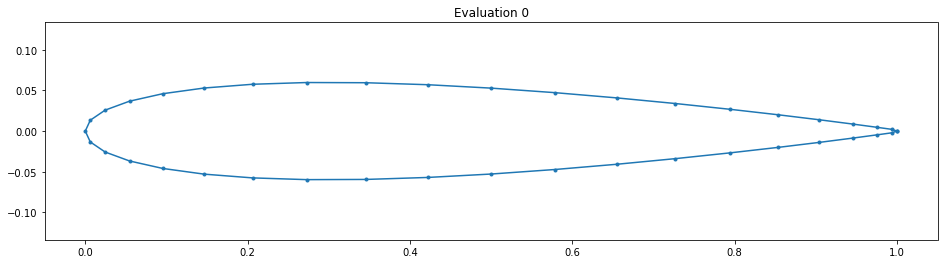

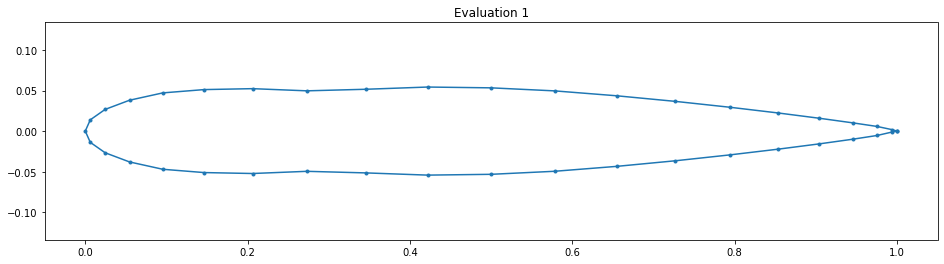

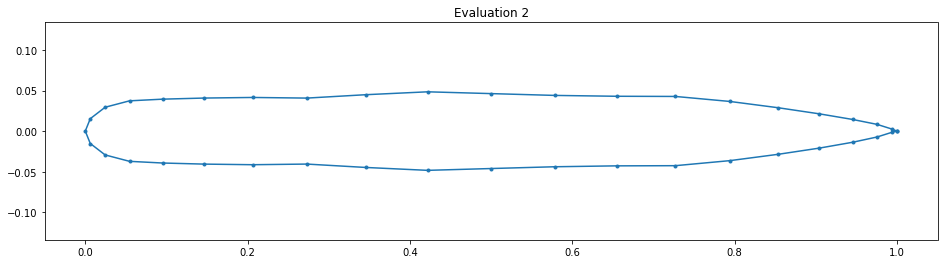

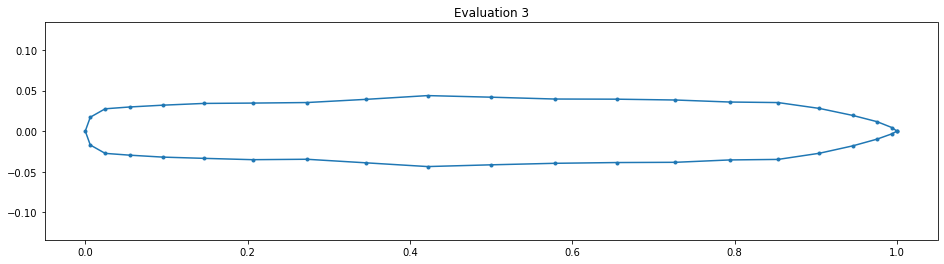

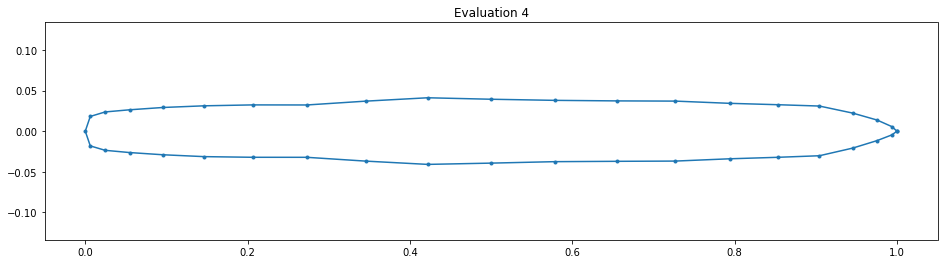

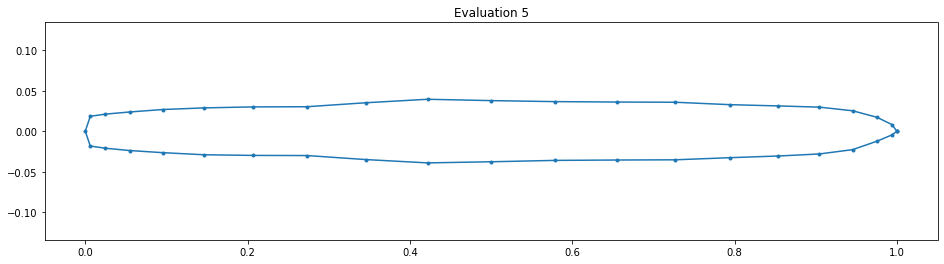

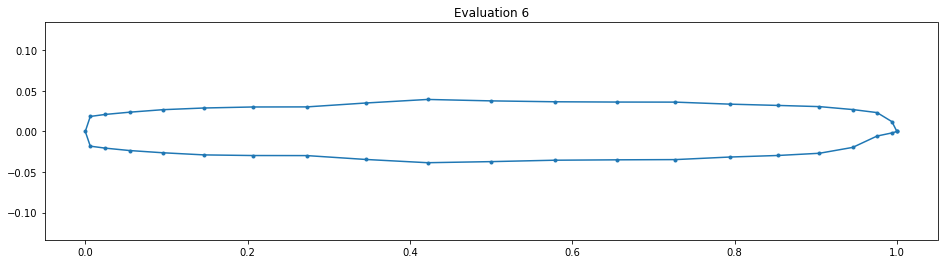

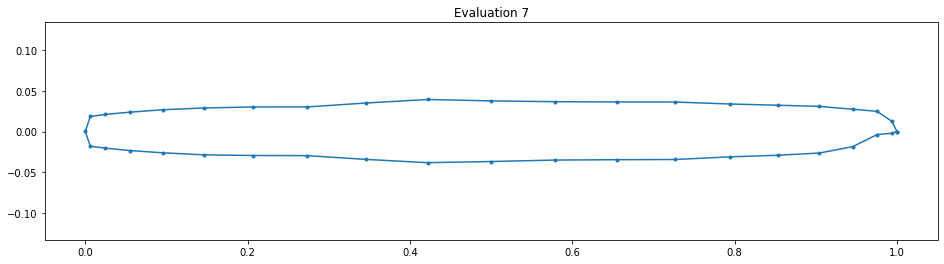

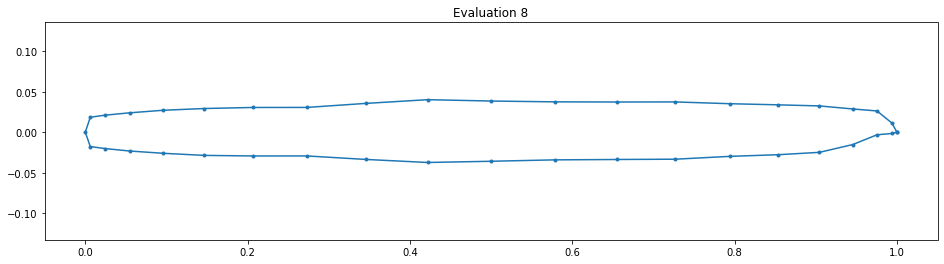

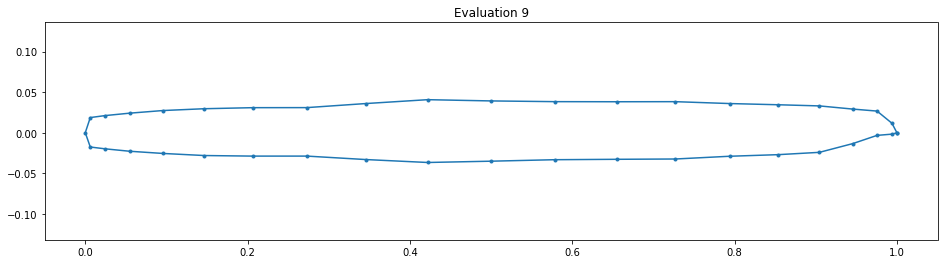

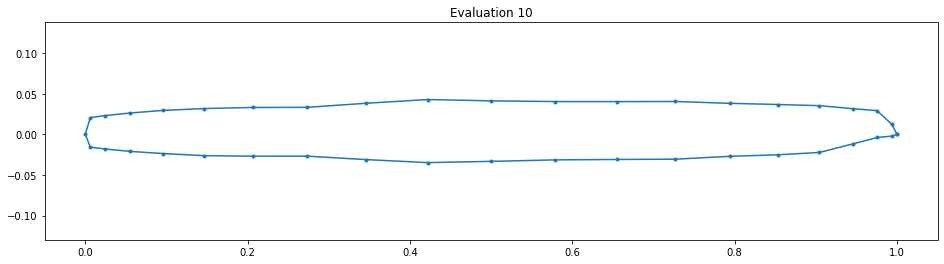

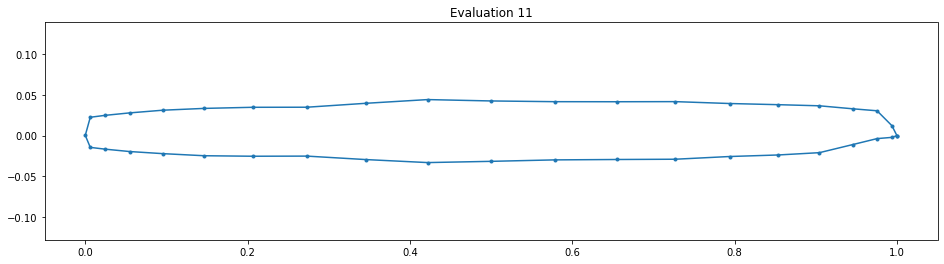

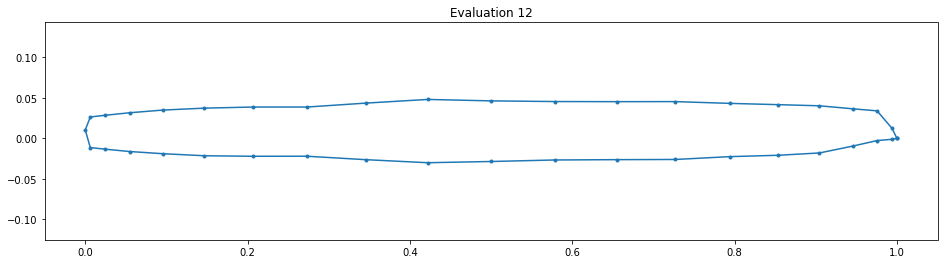

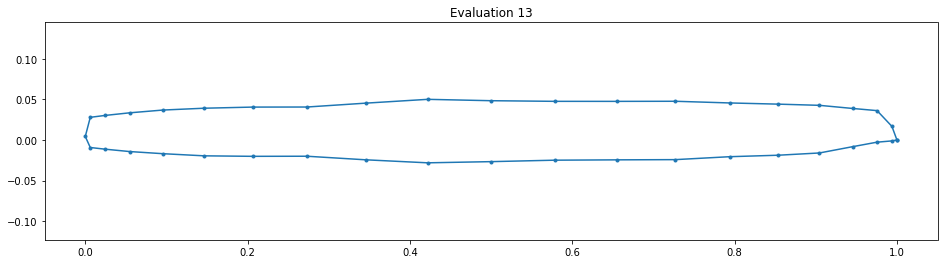

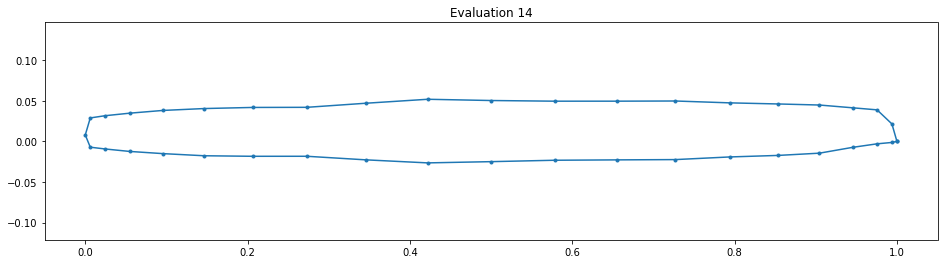

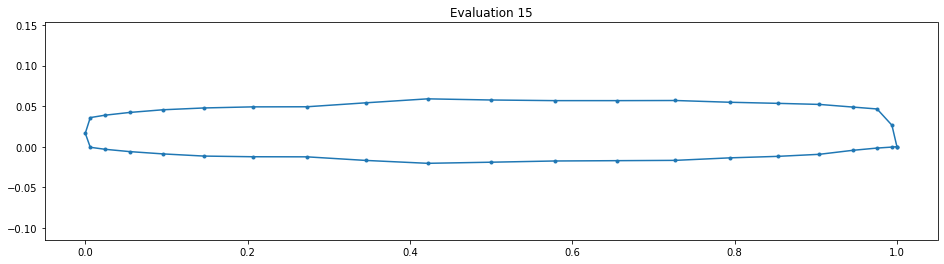

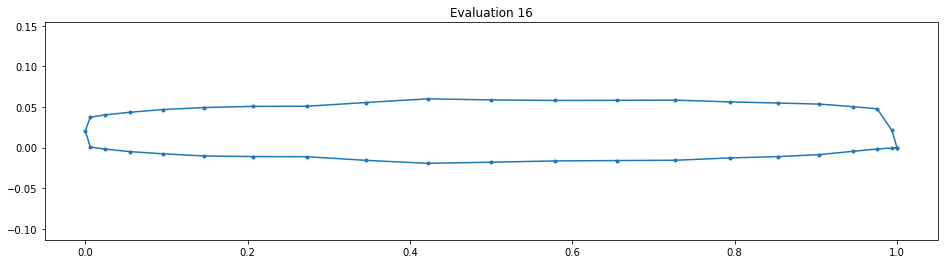

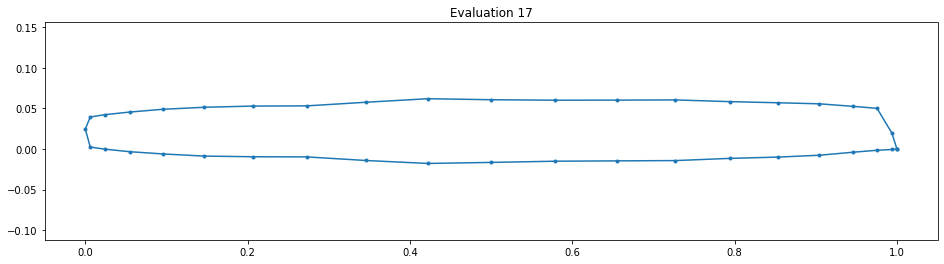

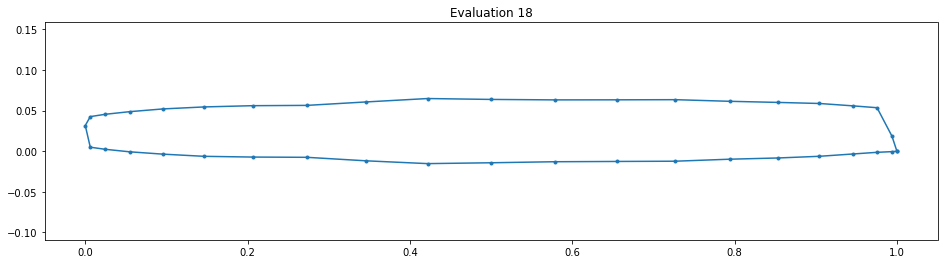

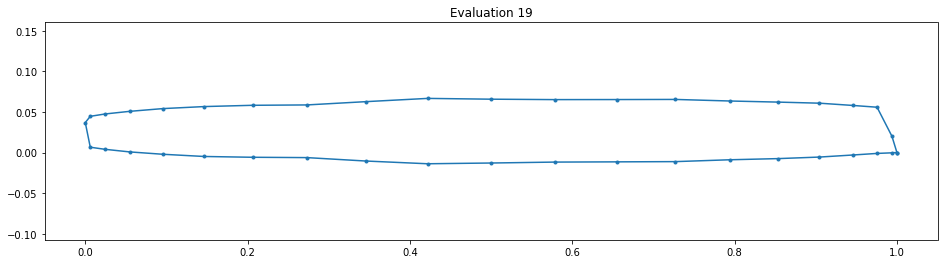

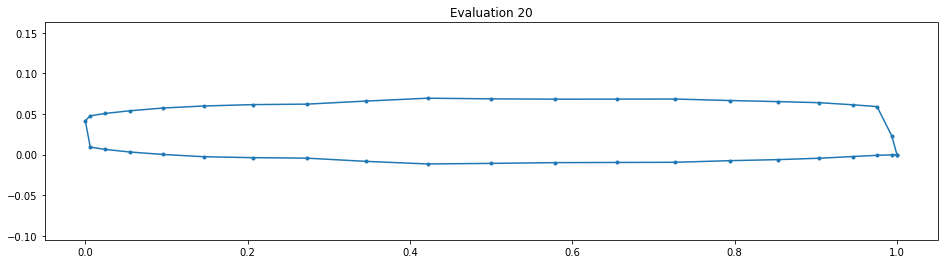

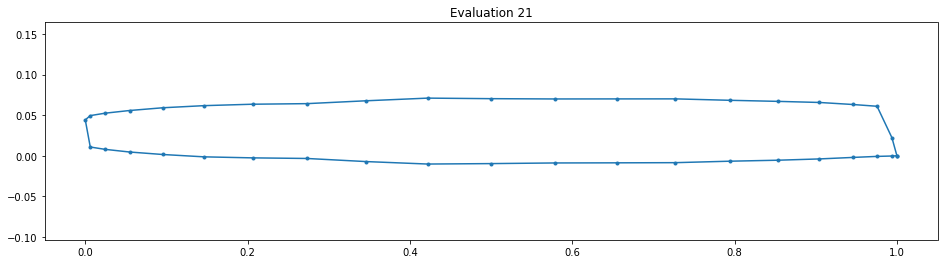

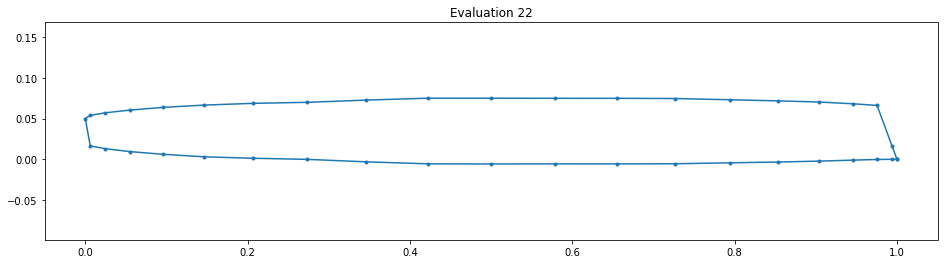

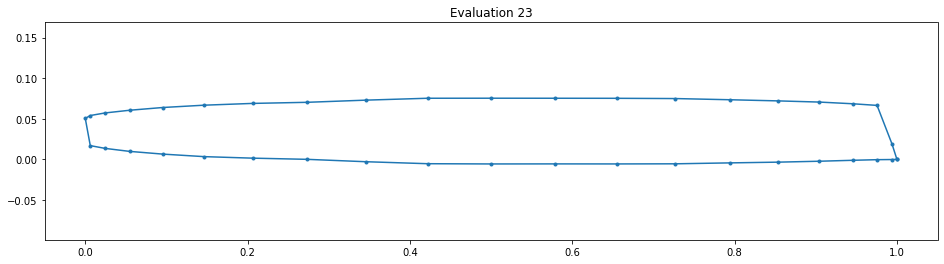

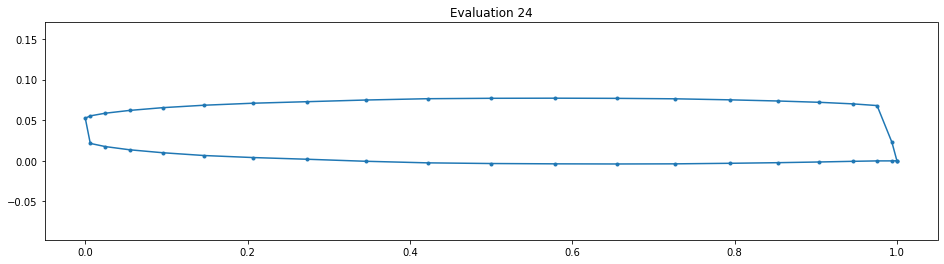

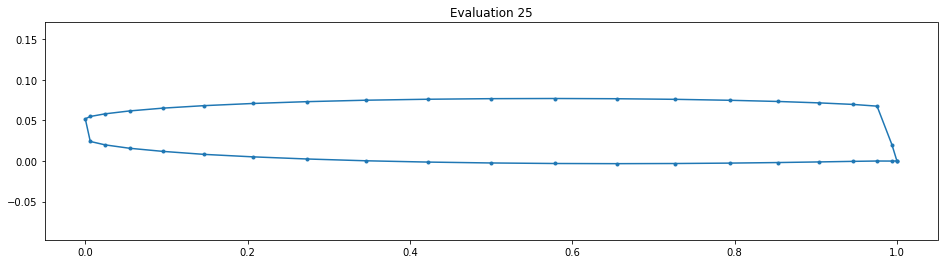

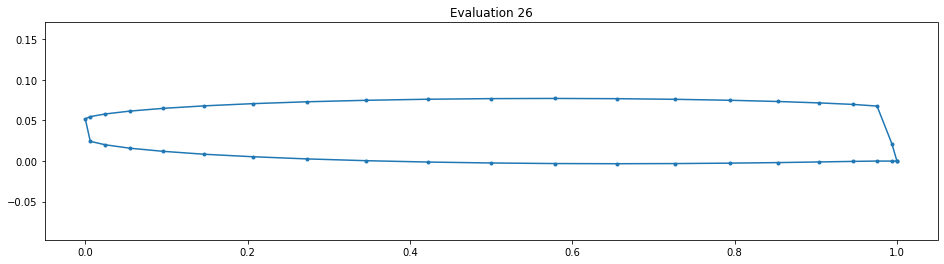

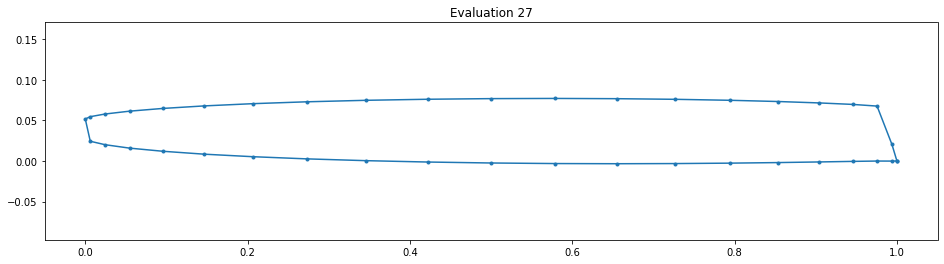

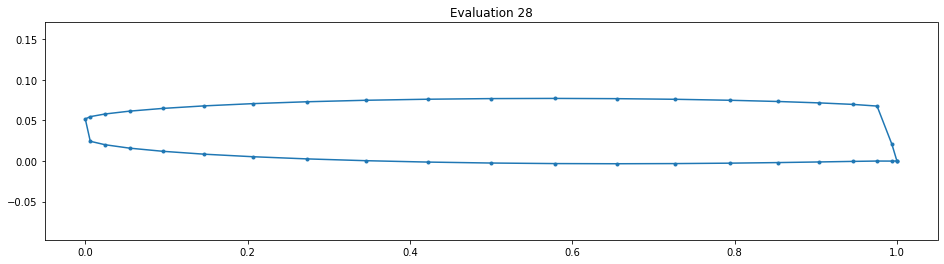

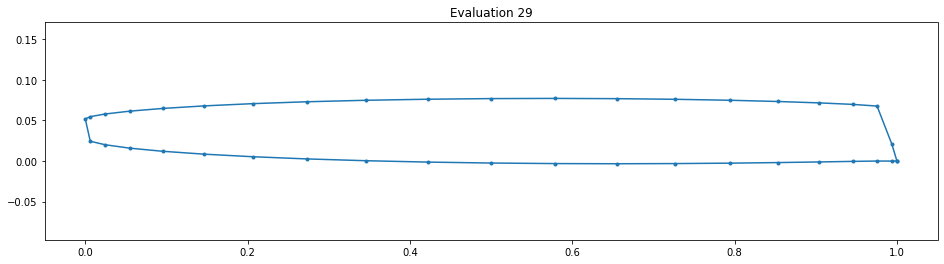

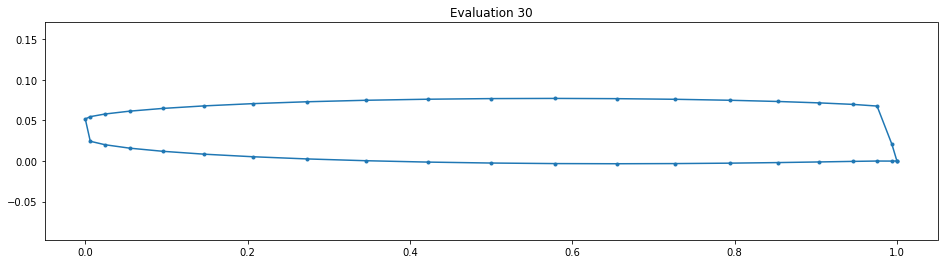

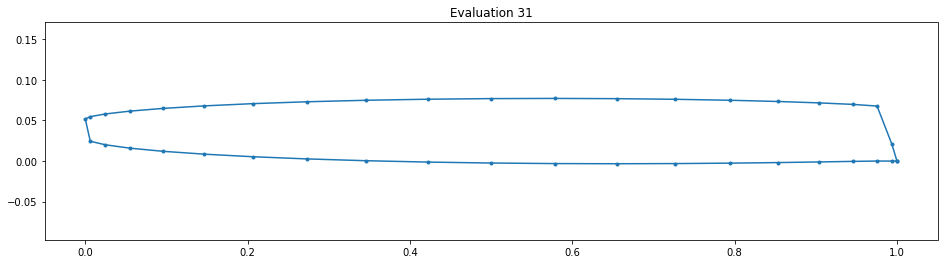

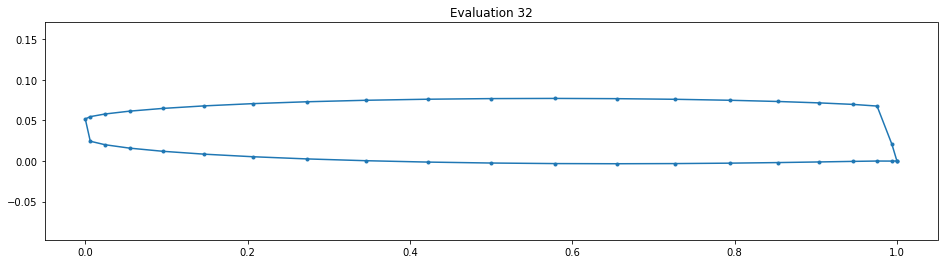

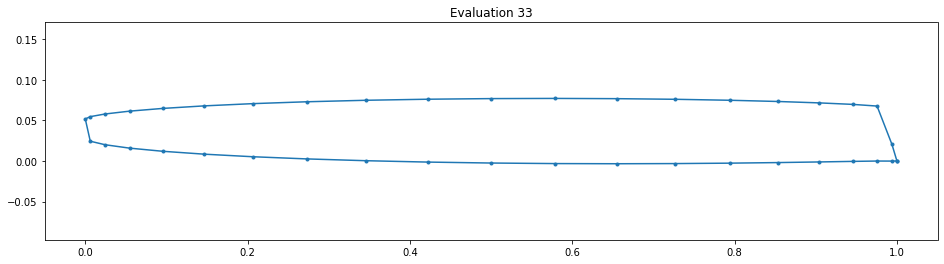

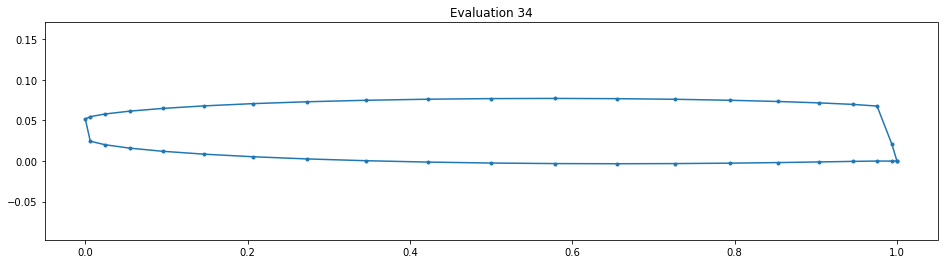

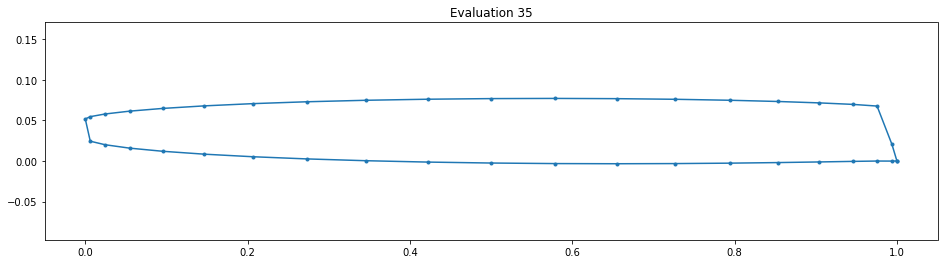

In [26]:
for i, x in enumerate(so.x_i[::10]):
    plt.figure(figsize=(16,4))
    plt.plot(x[:,0], x[:,1], '.-')
    plt.axis('equal')
    plt.title('Evaluation {}'.format(i))
    plt.show()

The lift coefficient:

In [27]:
x = so.x  # this is the last iterate

# recompute sigma:
pfpm = PotentialFlowPanelMethod(x, u_inf, alpha)
A, b = pfpm.assemble()
sigma = sl.solve(A, b)


print(af.lift(sigma, x))

1.9650317141175593


And plotting the flow solution:

C_L (PM): 1.9583548479479818


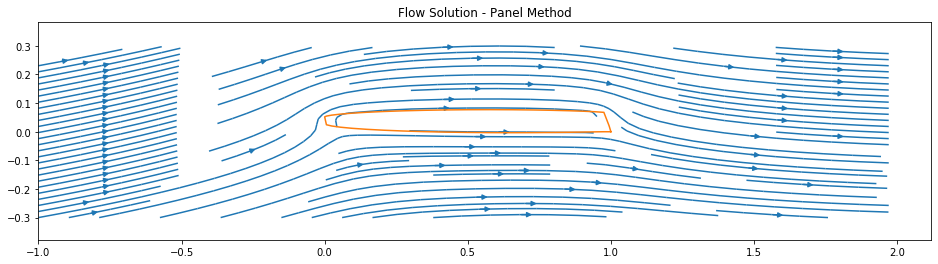

In [30]:
plt.figure(figsize=(16,4))
xg, yg = np.meshgrid(np.linspace(-1, 2, 40), np.linspace(-.3,.3, 40))
pfpm.plot_solution(sigma, xg, yg)
plt.title('Flow Solution - Panel Method')
plt.axis('equal');

print("C_L (PM):", pfpm.lift_coeffcient(sigma))

## Background: Penalty Term Based on Shape Factor (\*)

In the tutorial of lecture 4, we studied the shape factor $Q=l/\sqrt{A}$ where $l$ is the length (perimeter) around the airfoil cross section and $A$ its area. As it turns out this factor is a useful penalty term. Airfoils that are either to thin, or too thick in the vertical direction would encur a large value for $Q$ and thus not be considered optimal. Since we want to control the ratio between thickness and the distance between front and back (the "aspect ratio"), at the end of the second coursework notebook we introduced the functions `shape_factor_ar` and `grad_shape_factor_ar`, which depend on a configurable parameter `aspect_ratio`.

For the penalty term we need to choose a parameter $Q_{\text{max}}$ that is roughly the maximal allowable value for Q. By using a term of the form $-\log(Q_{\text{max}}-Q)$, the penalty grows rapidly as $Q$ approaches $Q_{\text{max}}$ from below. We want the optimisation to be able to deal with shapes that start out with a value of $Q$ bigger than $Q_{\text{max}}$ as well though. This requires that the penalty keeps on increasing for $Q>Q_{\text{max}}$, so that the optimisation algorithm knows to take a search direction in which the penalty term and thus $Q$ decreases. For this reason, we cap the $-\log(Q_{\text{max}}-Q)$-term if $Q$ gets very close to $Q_{\text{max}}$, and continue the penalty linearly, with the same slope, for larger $Q$. All in all this means, that the penalty takes the following form:

$$
   \text{penalty}(Q(\vec x)) =
   \begin{cases}
     -Q_{\text{scale}} \log(Q_{\text{max}}-Q(\vec x)) & \text{for}\; Q(\vec x)\lt Q_{\text{max}} - Q_{\text{eps}} \\
     Q_{\text{scale}} \left(\log(Q_{\text{eps}}) + \frac{Q(\vec x)-(Q_{\text{max}} - Q_{\text{eps}})}{Q_{\text{eps}}}\right) & \text{for}\; Q(\vec x)\ge Q_{\text{max}} - Q_{\text{eps}} \\
   \end{cases},
$$

where $Q_{\text{eps}}$ is the distance to $Q_{\text{max}}$ at which the $\log$-term is capped, $Q_{\text{scale}}$ is an overall scaling of the penalty term. Its derivative takes the following simple form:

$$
  \frac{\partial \text{penalty}(Q(\vec x))}{\partial\vec x} = \frac{Q_{\text{scale}}}{\max(Q_{\text{max}}-Q(\vec x), Q_{\text{eps}})} \frac{\partial Q(\vec x)}{\partial\vec x}
$$

The derivative $\frac{\partial Q}{\partial\vec x}$ is calculated in `grad_shape_factor_ar` using the `grad_shape_factor` you have developed in notebook two.